## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE

import warnings

warnings.filterwarnings("ignore")

## Exploratory data analysis

In [2]:
df = pd.read_csv('creditcard.csv')
# df = df.sample(frac=.1)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Observe different feature type present in the data

In [3]:
# Shape of input data
print(f"Dataset dimension:- Rows = {df.shape[0]}, Columns = {df.shape[1]}")

Dataset dimension:- Rows = 284807, Columns = 31


In [4]:
# Check for missing values in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### <font color='red'>Observation</font>: No missing values in the dataset as expected as the dataset is already normalized and reduced using PCA

Here we will observe the distribution of our classes

In [5]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

Text(0, 0.5, 'Count')

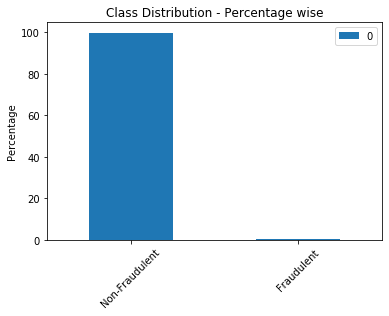

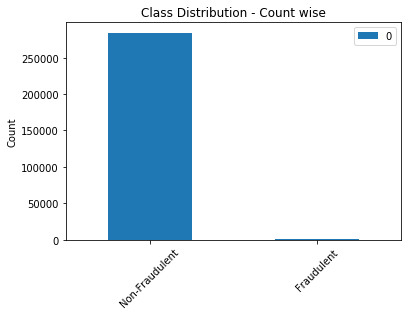

In [6]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
class_label = ["Non-Fraudulent", "Fraudulent"]

class_share = pd.DataFrame([normal_share, fraud_share])
class_share.plot(kind='bar')
plt.title("Class Distribution - Percentage wise")
plt.xticks(range(2), class_label, rotation=45)
plt.ylabel('Percentage')

class_count = pd.DataFrame([classes[0], classes[1]])
class_count.plot(kind='bar')
plt.title("Class Distribution - Count wise")
plt.xticks(range(2), class_label, rotation=45)
plt.ylabel('Count')

#### <font color='red'>Observation</font>: Fraudulent class data is very neglible compared to the non-fraudulent class data signifying we have a highly imbalanced data

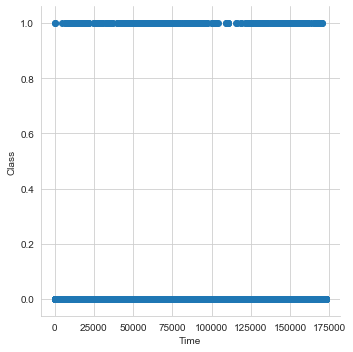

In [7]:
# Create a scatter plot to observe the distribution of classes with time
sns.set_style("whitegrid")
sns.FacetGrid(df, height = 5).map(plt.scatter, "Time", "Class")

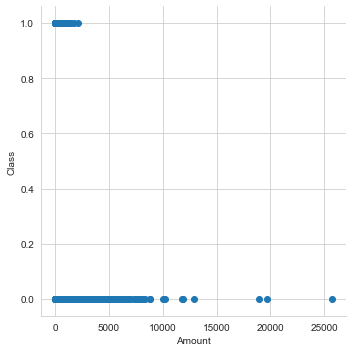

In [8]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.set_style("whitegrid")
sns.FacetGrid(df, height = 5).map(plt.scatter, "Amount", "Class")

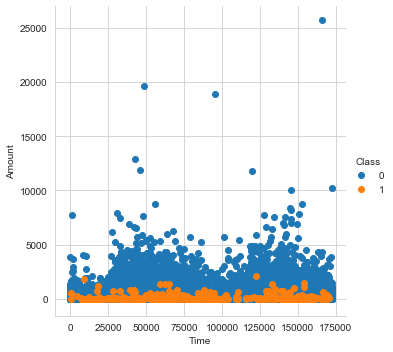

In [9]:
# Scatter plot of Time vs Amount
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="Class", height = 5).map(plt.scatter, "Time", "Amount").add_legend()

#### <font color='red'>Observation</font>: Above 3 plots shows that the fraud transactions happened for mostly small amount and almost unformly over time.

#### Some More Analysis

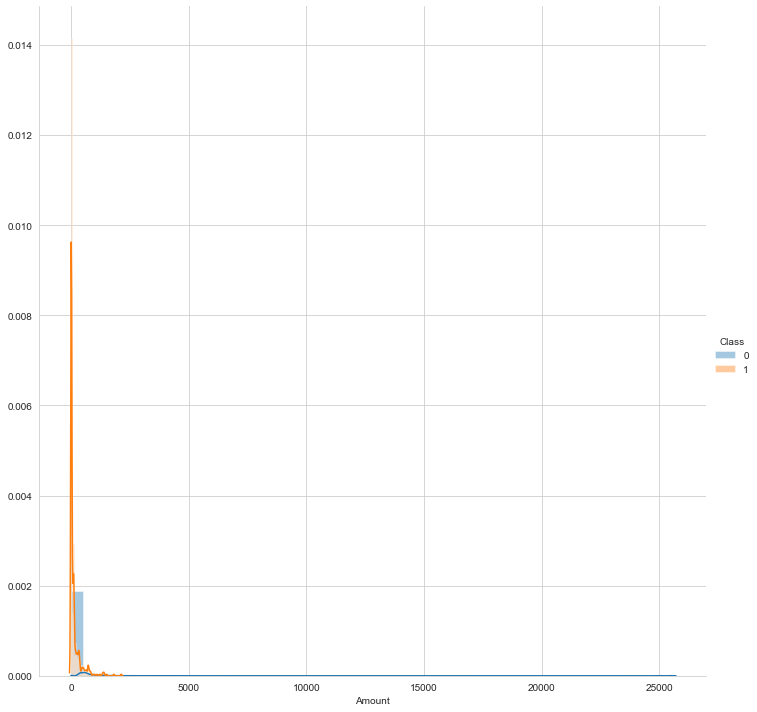

In [10]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="Class", height=10).map(sns.distplot, "Amount").add_legend()
plt.show()

In [11]:
df[df["Class"] == 1].Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
df[df["Class"] == 0].Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

#### <font color='red'>Observation</font>: All of the transactions for which fraud has happened, the trasaction value is less than 2500

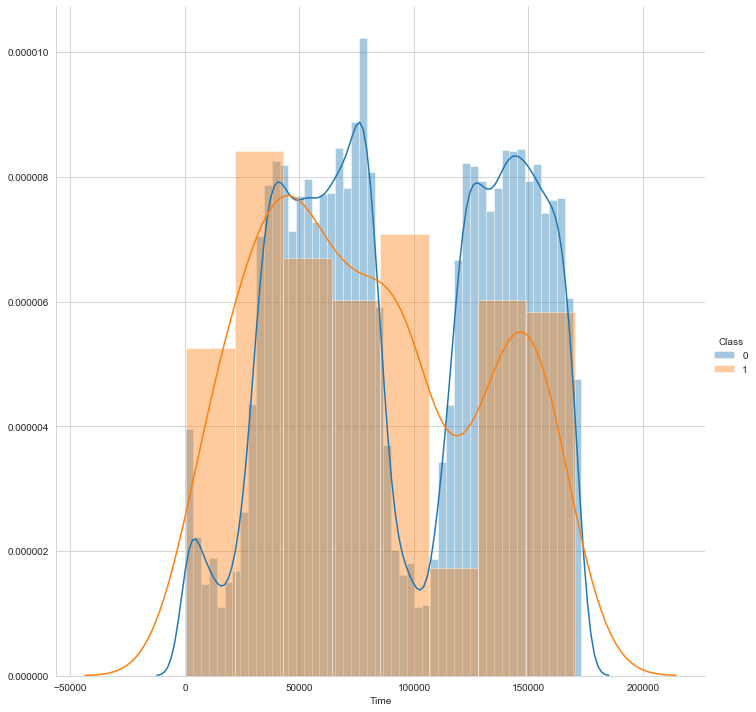

In [13]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="Class", height=10).map(sns.distplot, "Time").add_legend()
plt.show()

#### <font color='red'>Observation</font>: Not much of conclusive information as we have seen earlier as well that fraudulent transactions happen unformly throughout the time

In [14]:
# Drop unnecessary columns
from sklearn.preprocessing import StandardScaler

# Normalize Amount
df['Amt_Normalized'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))

# Remove "Time" and "Amount" columns as they will not be needed for modelling
curated_df1 = df.drop(['Time','Amount'],axis =1)
curated_df1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amt_Normalized
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


### Splitting the data into train & test data

In [15]:
y=curated_df1['Class']
X=curated_df1.drop(['Class'],axis=1)

In [16]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y, random_state=42, test_size=0.3)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [17]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


### Plotting the distribution of a variable

In [18]:
# plot the histogram of variables from the dataset to see the skewness

In [19]:
PCA_Vs= ['V%i' % k for k in range(1,29)]

Text(0.5, 1.0, 'Histograms of the Features')

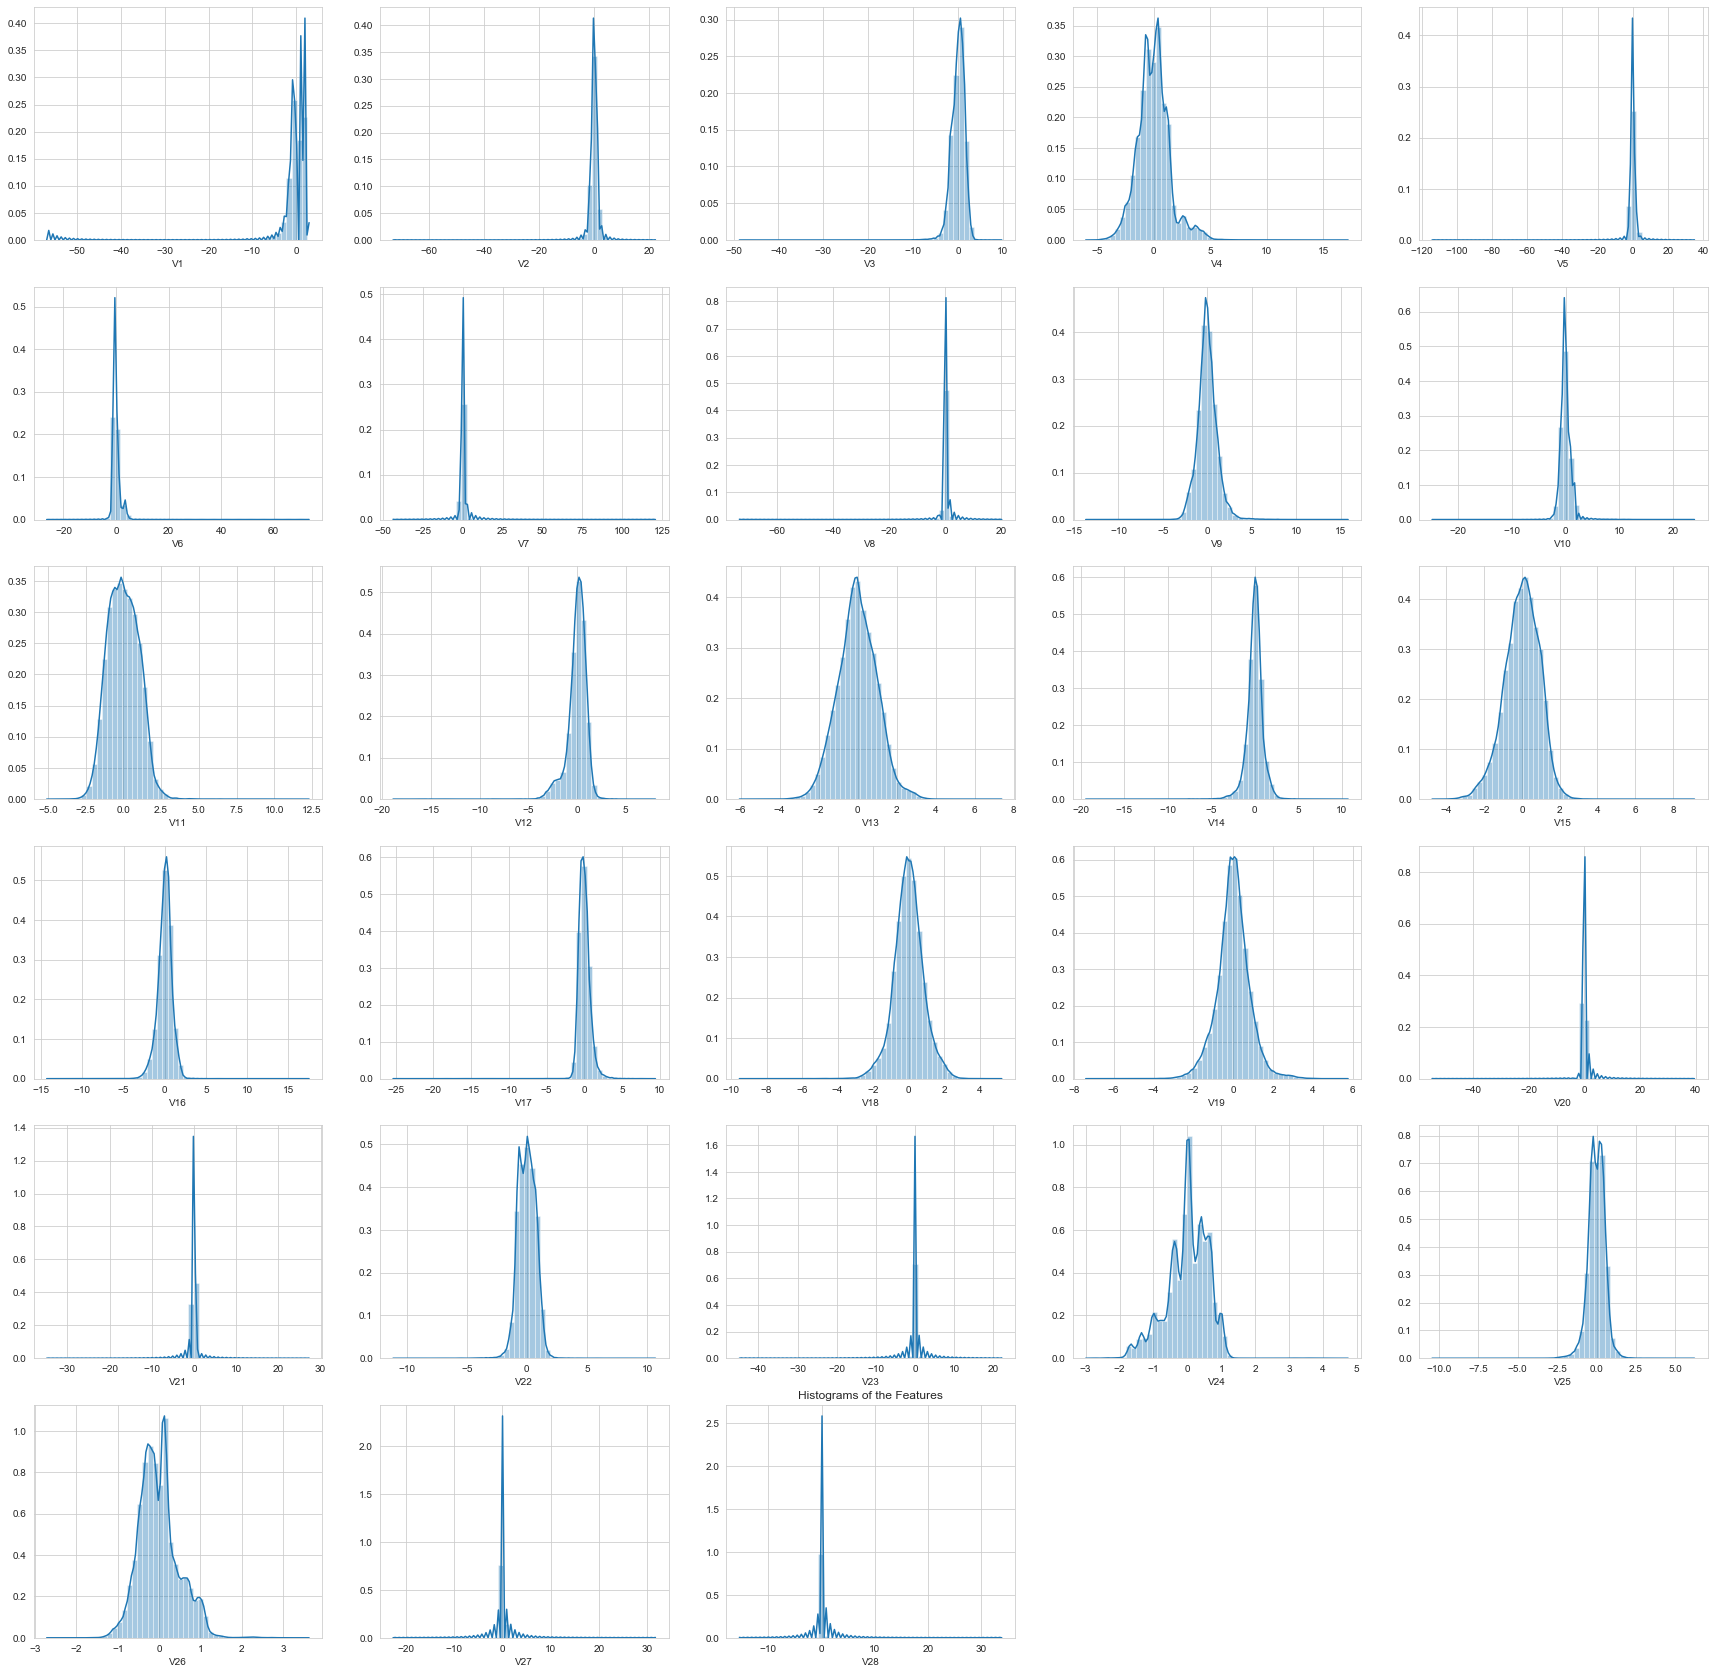

In [20]:
# Plot of X_train dataset
nrows=6
ncols=5
fig, ax = plt.subplots(figsize=(30,30))  
for i in range(len(PCA_Vs)):    
    sp=plt.subplot(nrows,ncols,i+1)
    sns.distplot(X_train[PCA_Vs[i]])
plt.title('Histograms of the Features')

Text(0.5, 1.0, 'Histograms of the Features')

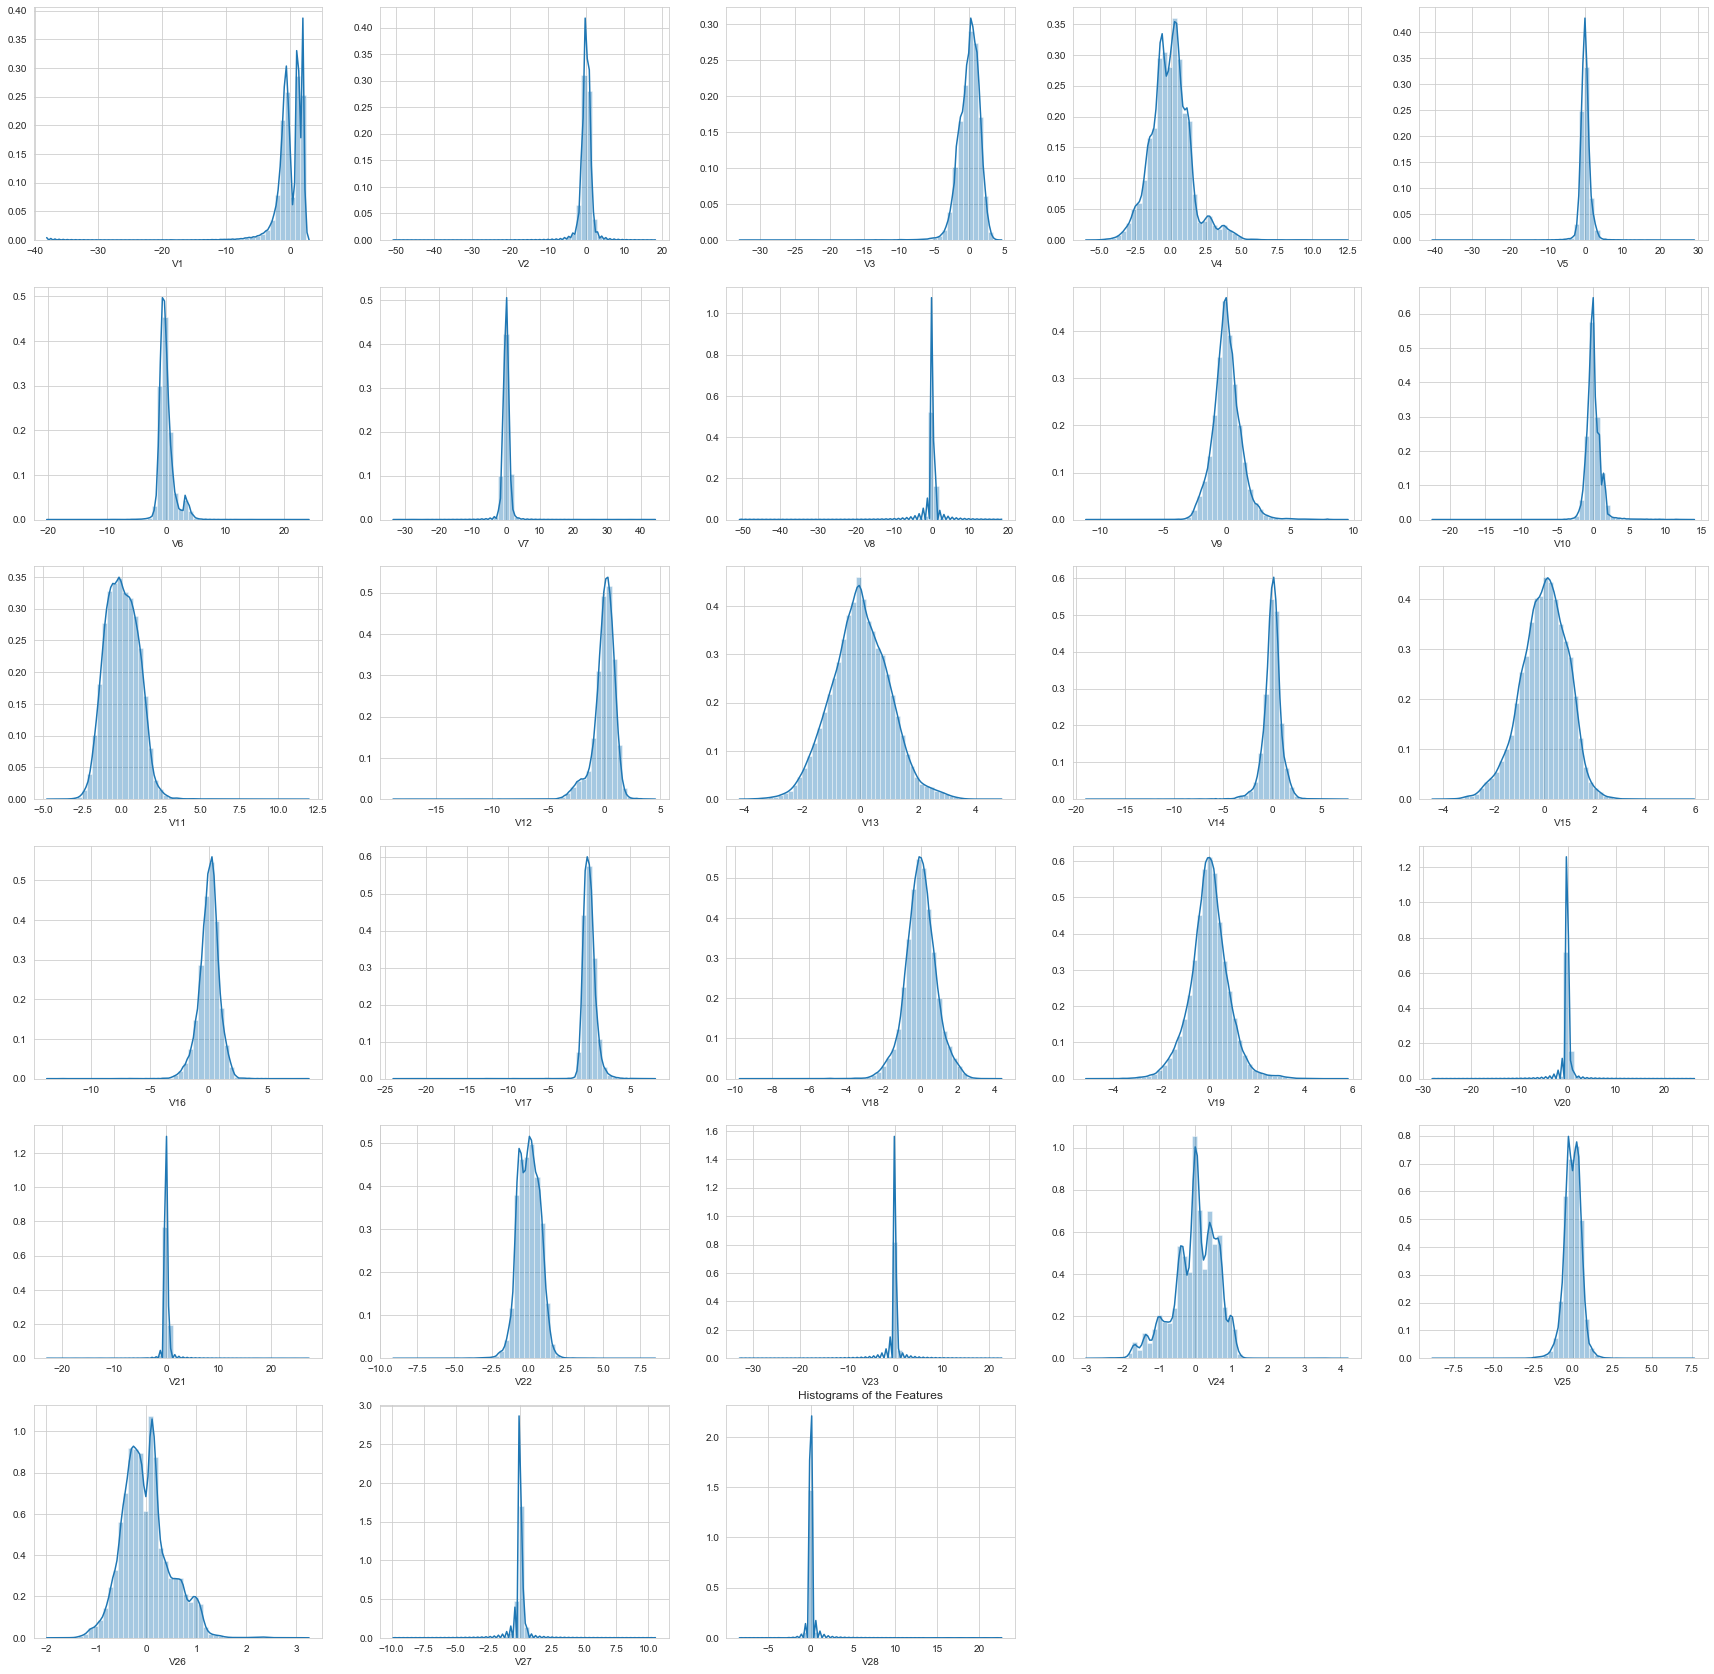

In [21]:
# Plot of X_test dataset
nrows=6
ncols=5
fig, ax = plt.subplots(figsize=(30,30))  
for i in range(len(PCA_Vs)):   
    sp=plt.subplot(nrows,ncols,i+1)
    sns.distplot(X_test[PCA_Vs[i]])
plt.title('Histograms of the Features')

#### <font color='red'>Observation</font>: There are skewness in some of the columns.

### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [22]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(copy=False)
columns = list(X_train.columns)
pt.fit(X_train)
X_train = pd.DataFrame(pt.transform(X_train), columns=columns)
X_test = pd.DataFrame(pt.transform(X_test), columns=columns)

In [23]:
# plot the histogram of a variable from the dataset again to see the result 

Text(0.5, 1.0, 'Histograms of the Features')

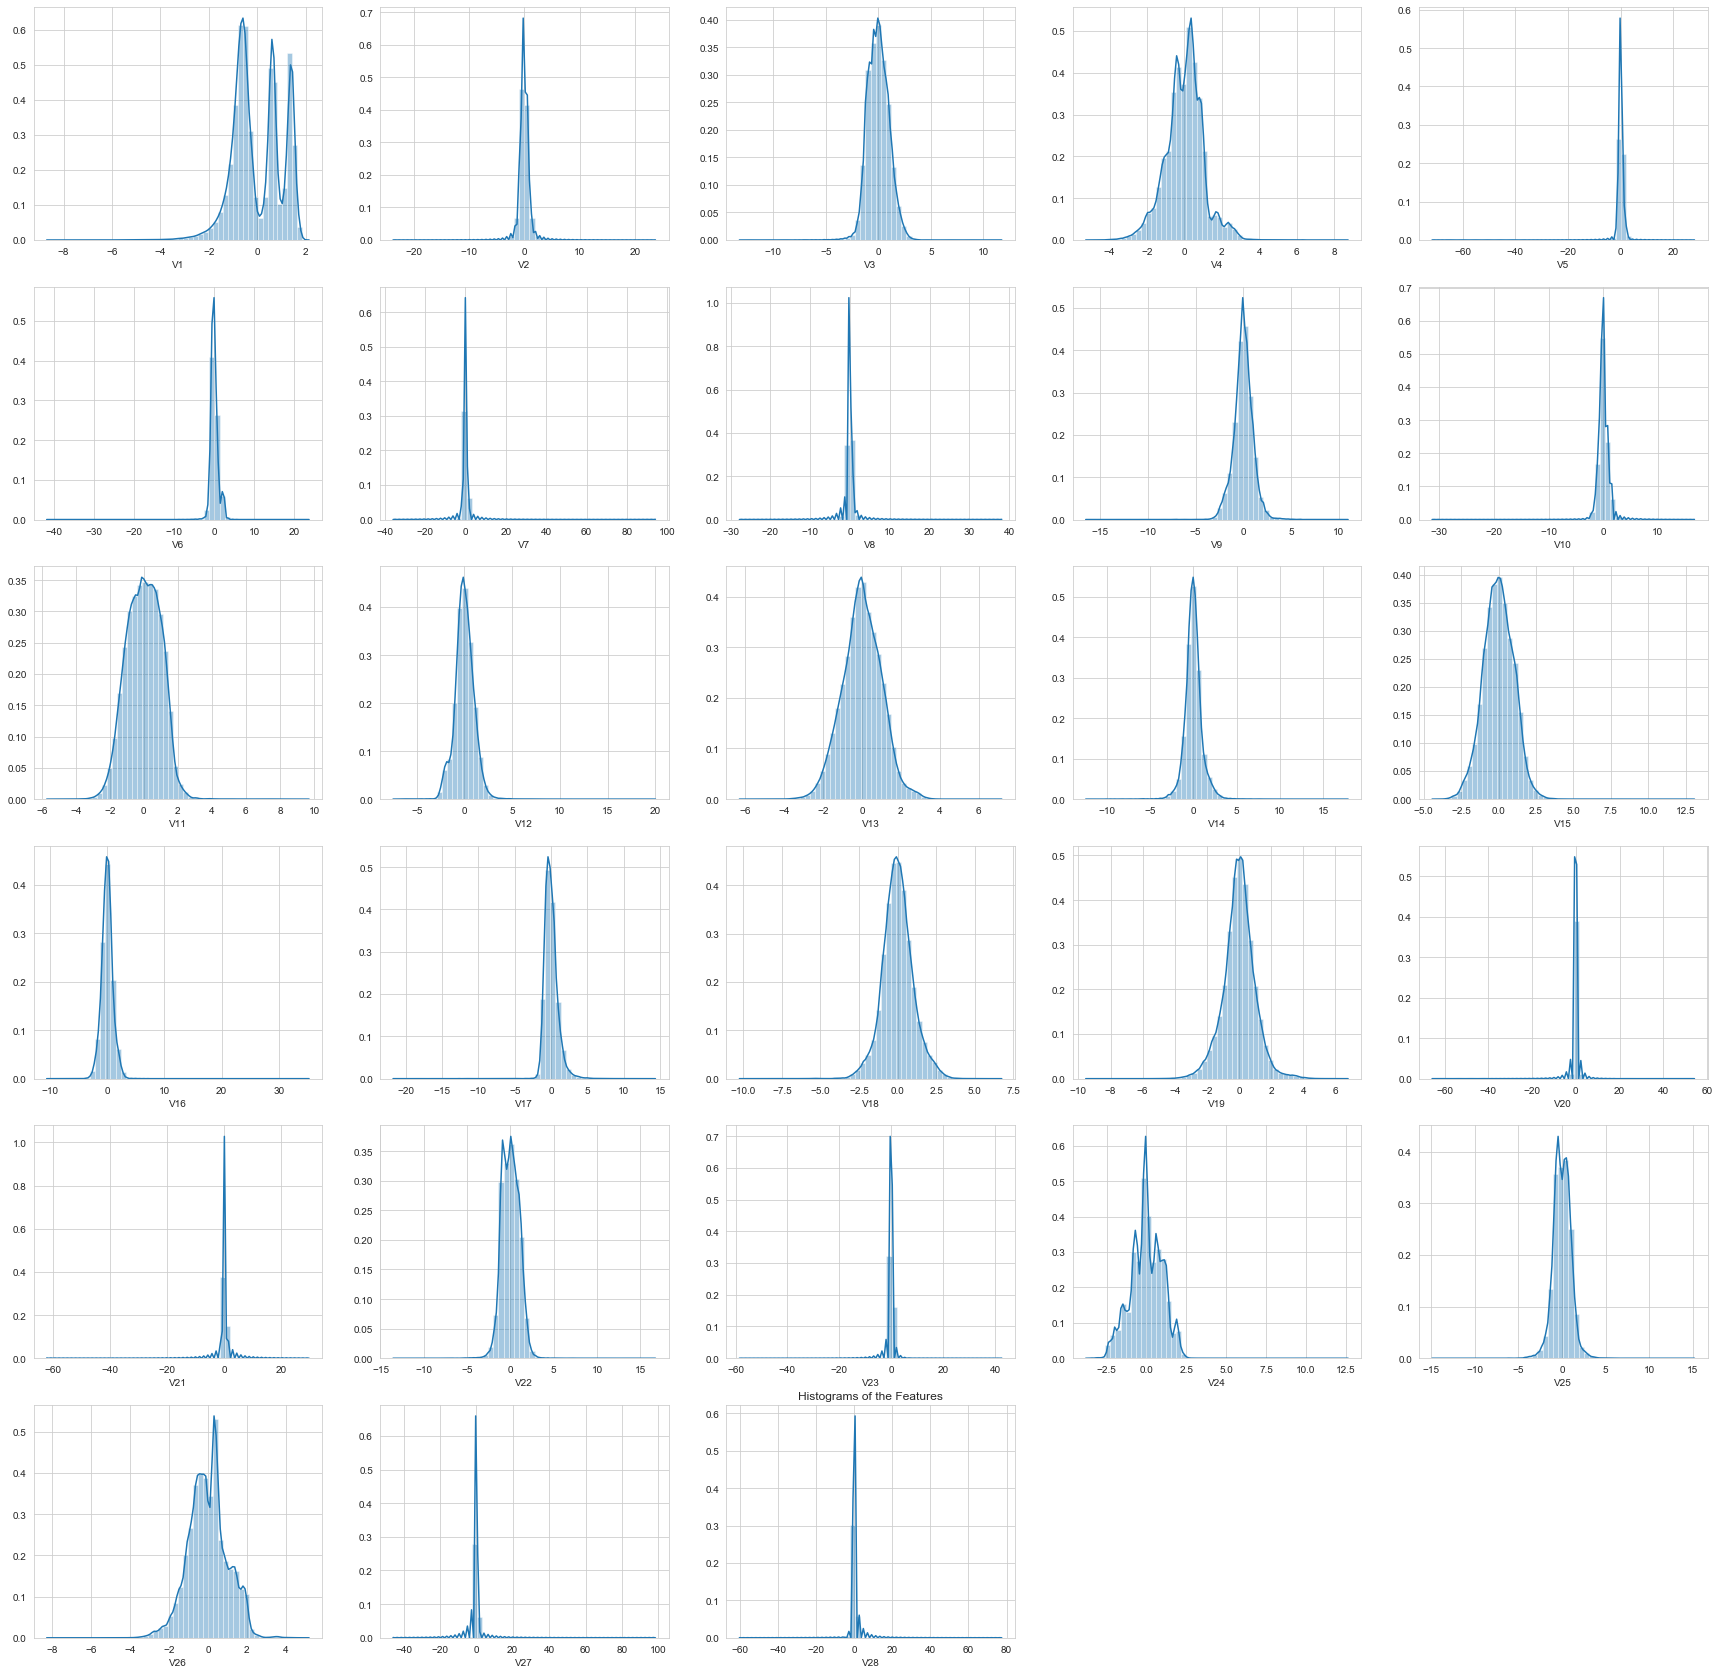

In [24]:
# Plot of X_train dataset
nrows=6
ncols=5
fig, ax = plt.subplots(figsize=(30,30))  
for i in range(len(PCA_Vs)):    
    sp=plt.subplot(nrows,ncols,i+1)
    sns.distplot(X_train[PCA_Vs[i]])
plt.title('Histograms of the Features')

Text(0.5, 1.0, 'Histograms of the Features')

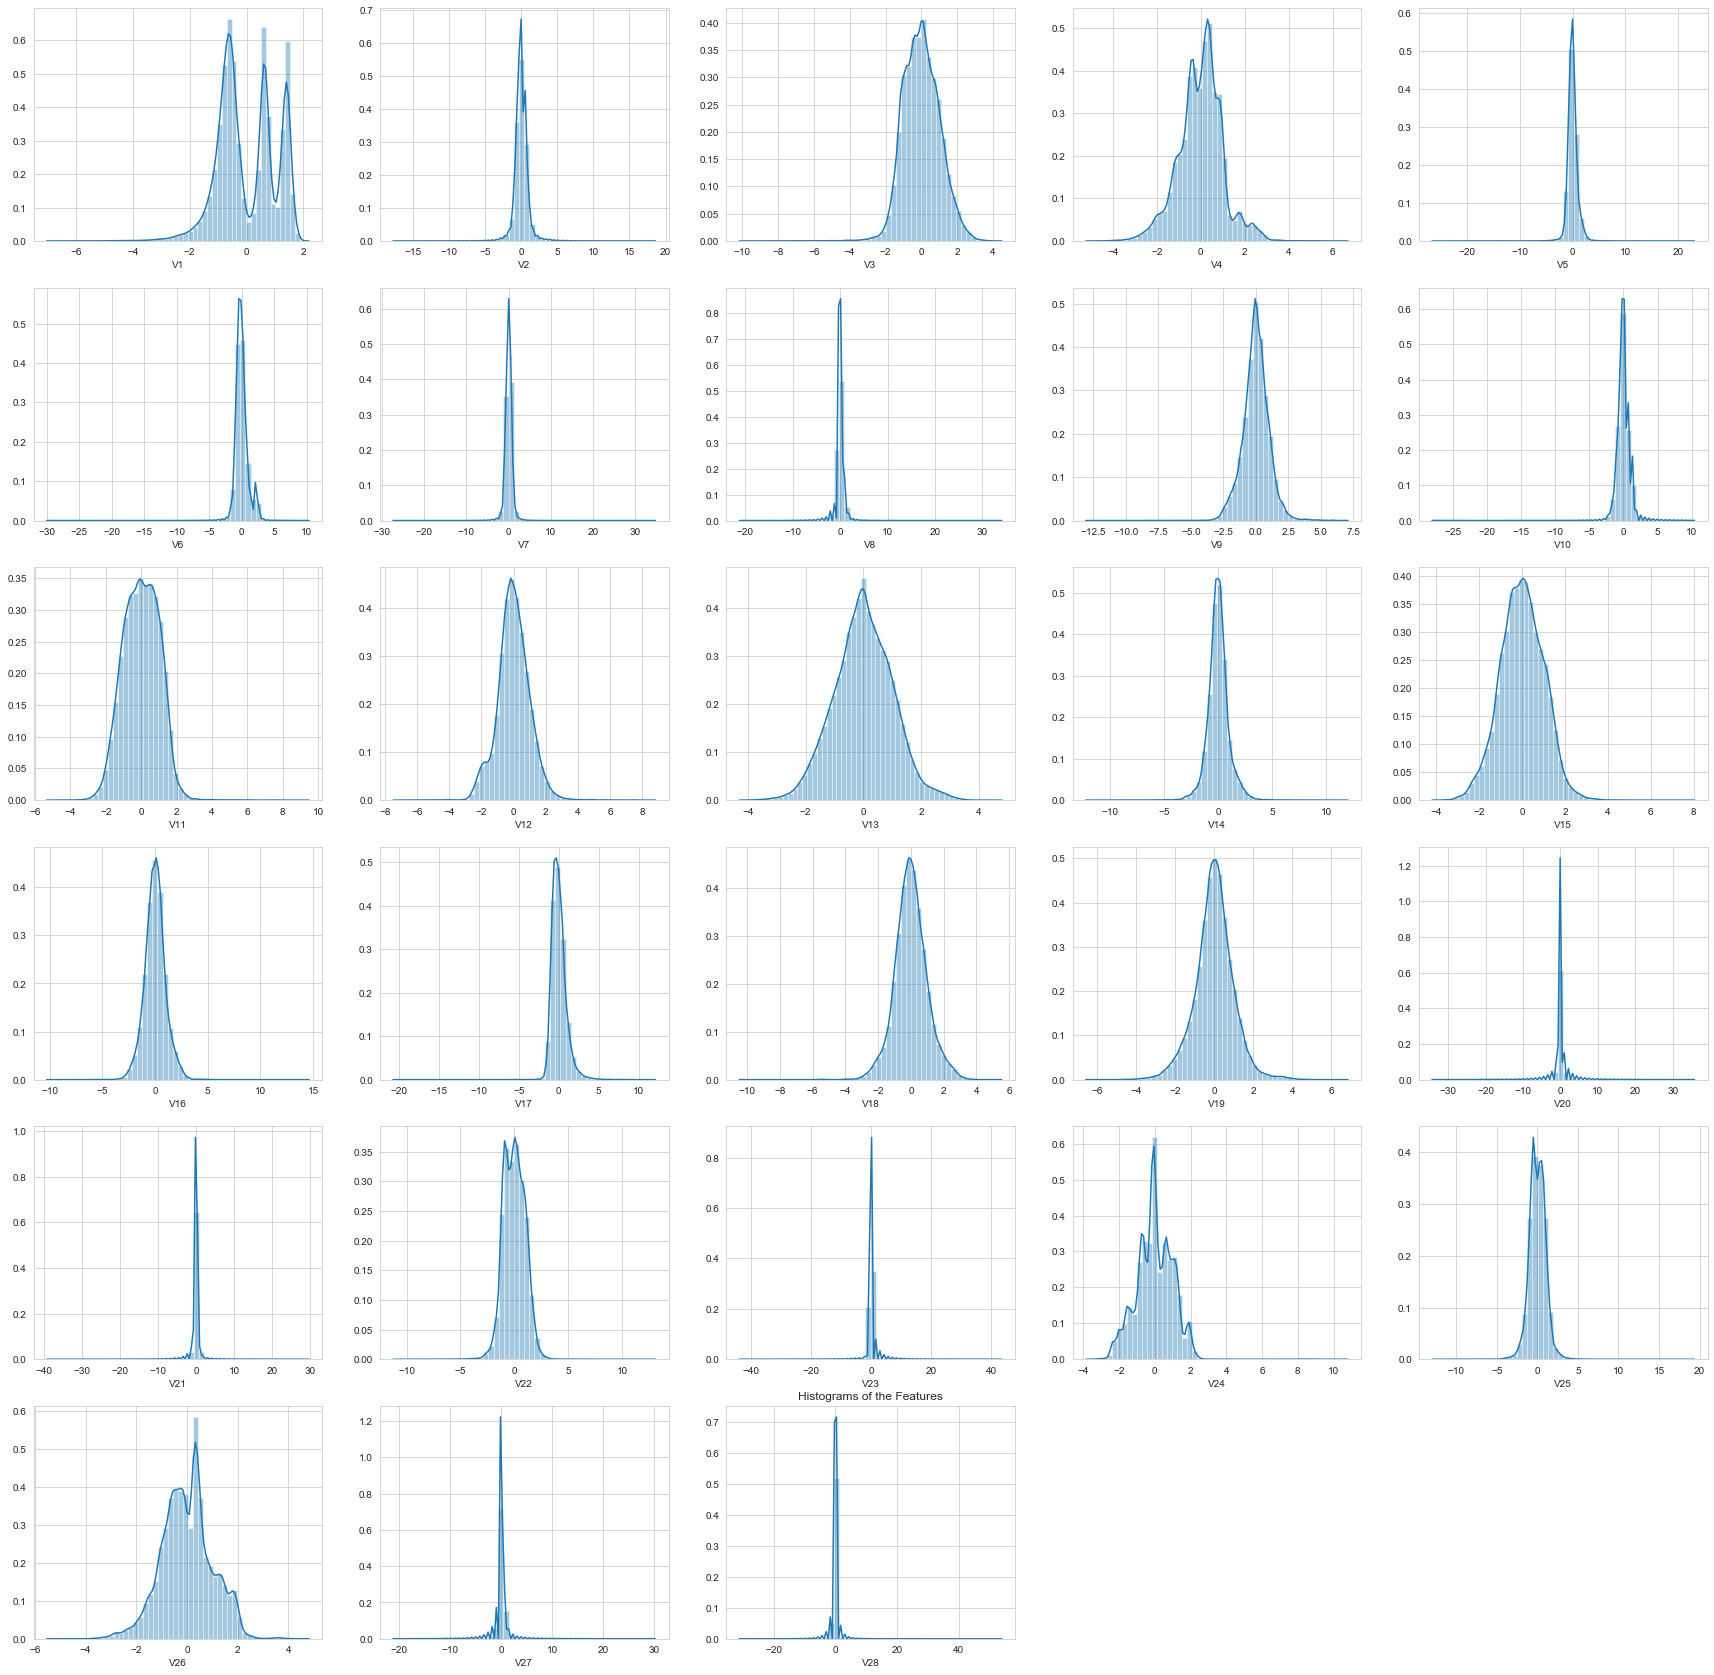

In [25]:
# Plot of X_test dataset
nrows=6
ncols=5
fig, ax = plt.subplots(figsize=(30,30))  
for i in range(len(PCA_Vs)):    
    sp=plt.subplot(nrows,ncols,i+1)
    sns.distplot(X_test[PCA_Vs[i]])
plt.title('Histograms of the Features')

#### <font color='red'>Observation</font>: Much of the skewness is removed from both of the dataset

## Model Building
- Build different models on the imbalanced dataset and see the result

In [26]:
# Logistic Regression
from sklearn import linear_model #import the package

num_C = np.logspace(-4, 4, 20)  #--> list of values
cv_num = 10  #--> list of values

#### perfom cross validation on the X_train & y_train to create:
- X_train_cv
- X_test_cv 
- y_train_cv
- y_test_cv 

In [27]:
#perform cross validation

#perform hyperparameter tuning

#print the evaluation result by choosing a evaluation metric

#print the optimum value of hyperparameters

In [28]:
# Generic Functions
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler


def get_score(model, X, y, n_splits=cv_num):
    skf = StratifiedKFold(n_splits=cv_num, random_state=42, shuffle=False)
    score = []
    for train_index, test_index in skf.split(X_transformed, y_transformed):
        X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train_cv, y_train_cv)
        score.append(model.score(X_test, y_test))
    return score


def plot_ROC(y_pred_incomplete, Y_test_under):
    fpr, tpr, thresholds = roc_curve( Y_test_under, y_pred_incomplete)
    roc_auc = auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-0.1, 1.0])
    plt.ylim([-0.1, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


def hyperparam_tuner(model, X_train, y_train, hyperparameters):  
    clf = GridSearchCV(model, hyperparameters, cv=cv_num, verbose=1)
    return clf.fit(X_train, y_train)


def random_oversampler(X, y):
    oversample = RandomOverSampler(sampling_strategy='minority')
    X_over, y_over = oversample.fit_resample(X, y)
    return X, y


def smote(X, y):  
#     sm = SMOTE(ratio='minority', random_state=42, kind='borderline1')
    sm = SMOTE(random_state=42)
    X_smote, y_smote = sm.fit_resample(X, y)
    X_smote = pd.DataFrame(X_smote, columns=X.columns)
    y_smote = pd.Series(y_smote)
    return X_smote, y_smote


def adasyn(X, y):  
    ada = ADASYN(random_state=42)
    X_res, y_res = ada.fit_resample(X, y)  
    return X, y

#### Logistic Regression

In [29]:
#perform cross validation
from sklearn.linear_model import LogisticRegression

X_transformed = pd.concat([X_train, X_test], axis=0)
y_transformed = pd.concat([y_train, y_test], axis=0)
score = get_score(LogisticRegression(), X_transformed, y_transformed)

In [30]:
#perform hyperparameter tuning
penalty = ['l1', 'l2']
hyperparameters = dict(C=num_C, penalty=penalty)
best_model = hyperparam_tuner(LogisticRegression(), X_train, y_train, hyperparameters)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  3.7min finished


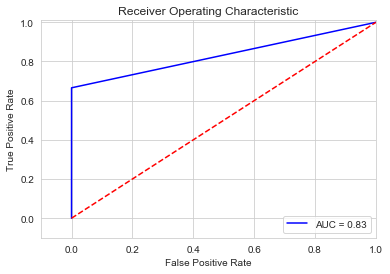

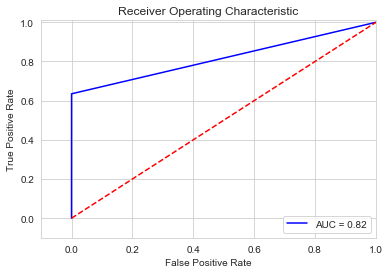

In [31]:
plot_ROC(best_model.predict(X_train), y_train)
plot_ROC(best_model.predict(X_test), y_test)

### Observation: With undersampling, overall performance is bad as the Test AUC score is very less than Train AUC score

#### KNN

Start of iteration for k=1 at 2020-06-29 12:40:48
Model fit done for k=1 at 2020-06-29 12:40:51
End of iteration for k=1 at 2020-06-29 12:47:42
Start of iteration for k=2 at 2020-06-29 12:47:42
Model fit done for k=2 at 2020-06-29 12:47:45
End of iteration for k=2 at 2020-06-29 13:11:30
Start of iteration for k=3 at 2020-06-29 13:11:30
Model fit done for k=3 at 2020-06-29 13:11:34
End of iteration for k=3 at 2020-06-29 13:41:16
Start of iteration for k=4 at 2020-06-29 13:41:16
Model fit done for k=4 at 2020-06-29 13:41:19
End of iteration for k=4 at 2020-06-29 14:14:21


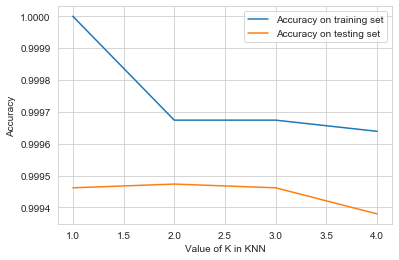

In [32]:
from datetime import datetime
k_range = range(1, 5)
score1=[]
score2=[]
for k in k_range:
    tm = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"Start of iteration for k={k} at {tm}")
    
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    tm = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"Model fit done for k={k} at {tm}")

    score1.append(knn.score(X_train, y_train))
    score2.append(knn.score(X_test, y_test))
    tm = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"End of iteration for k={k} at {tm}")
    
%matplotlib inline
plt.plot(k_range, score1, label= 'Accuracy on training set')
plt.plot(k_range, score2, label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()

Accuracy of KNN n=3 on the testing dataset is :0.99946


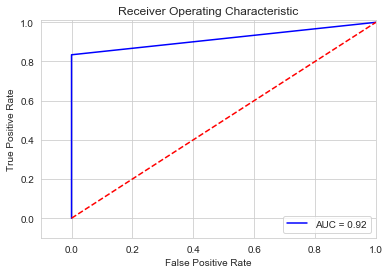

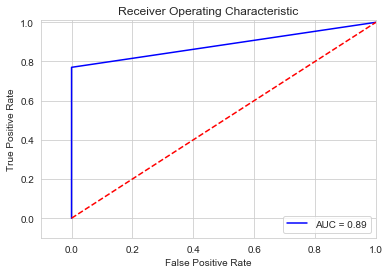

In [33]:
best_model=KNeighborsClassifier(n_neighbors=3)
best_model.fit(X_train,y_train)
print('Accuracy of KNN n=3 on the testing dataset is :{:.5f}'.format(best_model.score(X_test,y_test)))

plot_ROC(best_model.predict(X_train), y_train)
plot_ROC(best_model.predict(X_test), y_test)

### Observation: Like Logistic Regression, the model is performing poorly for test datsaet compared to the train dataset

### Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [10,50],
    'max_features': [.5,.7],
    'bootstrap': [False, True],
    'max_depth':[3,6]
}

best_model = hyperparam_tuner(RandomForestClassifier(), X_train, y_train, param_grid)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed: 174.4min finished


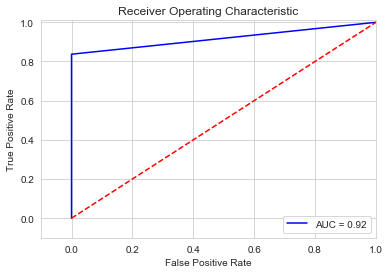

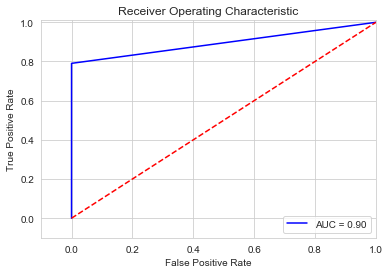

In [35]:
plot_ROC(best_model.predict(X_train), y_train)
plot_ROC(best_model.predict(X_test), y_test)

## Random Over-Sampling

#### Logistic Regression

In [36]:
#perform cross validation
from sklearn.linear_model import LogisticRegression

X_transformed = pd.concat([X_train, X_test], axis=0)
y_transformed = pd.concat([y_train, y_test], axis=0)
X_over, y_over = random_oversampler(X_transformed, y_transformed)
score = get_score(LogisticRegression(), X_over, y_over)
print(score)

[0.9991924440855307, 0.9992275552122467, 0.9991573329588147, 0.9991456292499094, 0.9991807403766253, 0.9991807403766253, 0.9991807403766253, 0.999204147794436, 0.9991456292499094, 0.99916903666772]


In [37]:
#perform hyperparameter tuning
penalty = ['l1', 'l2']
hyperparameters = dict(C=num_C, penalty=penalty)
X_train_over, y_train_over = random_oversampler(X_train, y_train)
best_model = hyperparam_tuner(LogisticRegression(), X_train_over, y_train_over, hyperparameters)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  3.6min finished


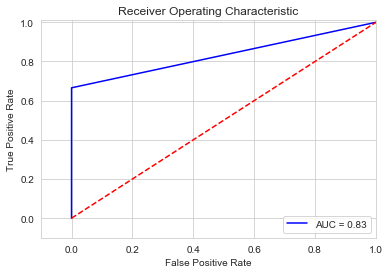

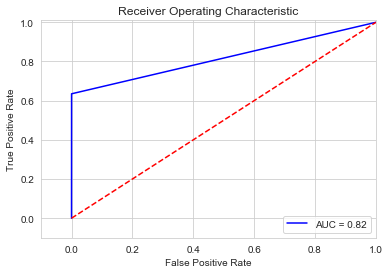

In [38]:
plot_ROC(best_model.predict(X_train), y_train)
plot_ROC(best_model.predict(X_test), y_test)

#### KNN

Start of iteration for k=1 at 2020-06-29 17:57:03
Model fit done for k=1 at 2020-06-29 17:57:06
End of iteration for k=1 at 2020-06-29 18:03:24
Start of iteration for k=2 at 2020-06-29 18:03:24
Model fit done for k=2 at 2020-06-29 18:03:27
End of iteration for k=2 at 2020-06-29 18:26:15
Start of iteration for k=3 at 2020-06-29 18:26:15
Model fit done for k=3 at 2020-06-29 18:26:18
End of iteration for k=3 at 2020-06-29 18:57:34
Start of iteration for k=4 at 2020-06-29 18:57:34
Model fit done for k=4 at 2020-06-29 18:57:37
End of iteration for k=4 at 2020-06-29 19:30:41


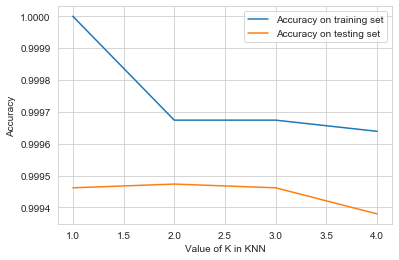

In [39]:
from datetime import datetime
k_range = range(1, 5)
score1=[]
score2=[]
for k in k_range:
    tm = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"Start of iteration for k={k} at {tm}")
    
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_over,y_train_over)
    tm = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"Model fit done for k={k} at {tm}")

    score1.append(knn.score(X_train, y_train))
    score2.append(knn.score(X_test, y_test))
    tm = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"End of iteration for k={k} at {tm}")
    
%matplotlib inline
plt.plot(k_range, score1, label= 'Accuracy on training set')
plt.plot(k_range, score2, label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()

Accuracy of KNN n=3 on the testing dataset is :0.99946


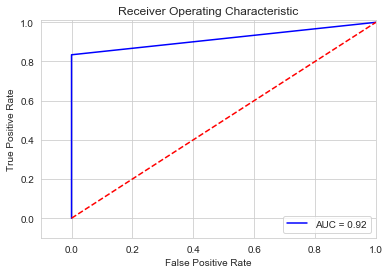

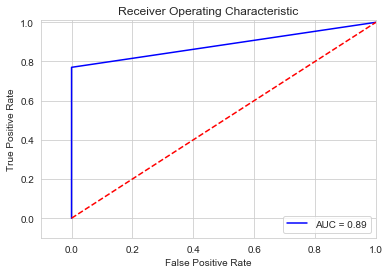

In [40]:
best_model=KNeighborsClassifier(n_neighbors=3)
best_model.fit(X_train_over,y_train_over)
print('Accuracy of KNN n=3 on the testing dataset is :{:.5f}'.format(best_model.score(X_test,y_test)))

plot_ROC(best_model.predict(X_train), y_train)
plot_ROC(best_model.predict(X_test), y_test)

#### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [10,50],
    'max_features': [.5,.7],
    'bootstrap': [False, True],
    'max_depth':[3,6]
}

best_model = hyperparam_tuner(RandomForestClassifier(), X_train_over, y_train_over, param_grid)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed: 197.7min finished


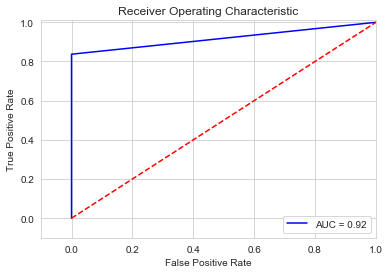

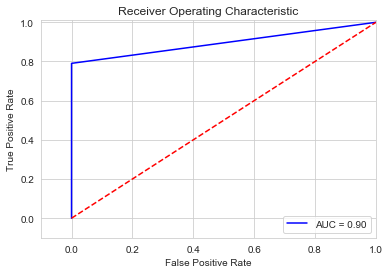

In [42]:
plot_ROC(best_model.predict(X_train), y_train)
plot_ROC(best_model.predict(X_test), y_test)

## SMOTE

#### Logistic Regression

In [43]:
#perform cross validation
from sklearn.linear_model import LogisticRegression

X_transformed = pd.concat([X_train, X_test], axis=0)
y_transformed = pd.concat([y_train, y_test], axis=0)
X_smote, y_smote = smote(X_transformed, y_transformed)
score = get_score(LogisticRegression(), X_smote, y_smote)
print(score)

[0.9991924440855307, 0.9992275552122467, 0.9991573329588147, 0.9991456292499094, 0.9991807403766253, 0.9991807403766253, 0.9991807403766253, 0.999204147794436, 0.9991456292499094, 0.99916903666772]


In [44]:
#perform hyperparameter tuning
penalty = ['l1', 'l2']
hyperparameters = dict(C=num_C, penalty=penalty)
X_train_smote, y_train_smote = smote(X_train, y_train)
best_model = hyperparam_tuner(LogisticRegression(), X_train_smote, y_train_smote, hyperparameters)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  7.8min finished


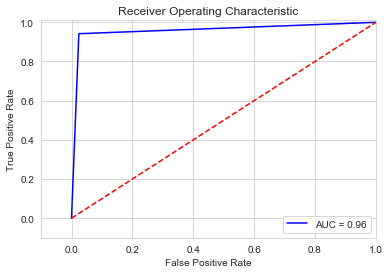

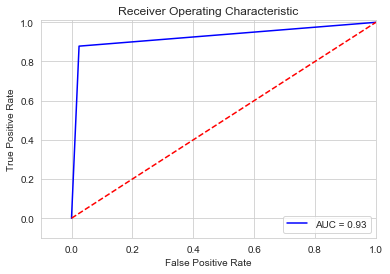

In [45]:
plot_ROC(best_model.predict(X_train), y_train)
plot_ROC(best_model.predict(X_test), y_test)

#### KNN

In [ ]:
from datetime import datetime
k_range = range(1, 5)
score1=[]
score2=[]
for k in k_range:
    tm = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"Start of iteration for k={k} at {tm}")
    
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_smote,y_train_smote)
    tm = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"Model fit done for k={k} at {tm}")

    score1.append(knn.score(X_train, y_train))
    score2.append(knn.score(X_test, y_test))
    tm = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"End of iteration for k={k} at {tm}")
    
%matplotlib inline
plt.plot(k_range, score1, label= 'Accuracy on training set')
plt.plot(k_range, score2, label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()

Start of iteration for k=1 at 2020-06-29 23:40:00
Model fit done for k=1 at 2020-06-29 23:40:06


In [ ]:
best_model=KNeighborsClassifier(n_neighbors=2)
best_model.fit(X_train_smote,y_train_smote)
print('Accuracy of KNN n=2 on the testing dataset is :{:.5f}'.format(best_model.score(X_test,y_test)))

plot_ROC(best_model.predict(X_train), y_train)
plot_ROC(best_model.predict(X_test), y_test)

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [10,50],
    'max_features': [.5,.7],
    'bootstrap': [False, True],
    'max_depth':[3,6]
}

best_model = hyperparam_tuner(RandomForestClassifier(), X_train_smote, y_train_smote, param_grid)

In [ ]:
plot_ROC(best_model.predict(X_train), y_train)
plot_ROC(best_model.predict(X_test), y_test)

## ADASYN

#### Logistic Regression

In [ ]:
#perform cross validation
from sklearn.linear_model import LogisticRegression

X_transformed = pd.concat([X_train, X_test], axis=0)
y_transformed = pd.concat([y_train, y_test], axis=0)
X_ada, y_ada = smote(X_transformed, y_transformed)
score = get_score(LogisticRegression(), X_ada, y_ada)
print(score)

In [ ]:
#perform hyperparameter tuning
penalty = ['l1', 'l2']
hyperparameters = dict(C=num_C, penalty=penalty)
X_train_ada, y_train_ada = adasyn(X_train, y_train)
best_model = hyperparam_tuner(LogisticRegression(), X_train_ada, y_train_ada, hyperparameters)

In [ ]:
plot_ROC(best_model.predict(X_train), y_train)
plot_ROC(best_model.predict(X_test), y_test)

#### KNN

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [10,50],
    'max_features': [.5,.7],
    'bootstrap': [False, True],
    'max_depth':[3,6]
}

best_model = hyperparam_tuner(RandomForestClassifier(), X_train_smote, y_train_smote, param_grid)

In [ ]:
from datetime import datetime
k_range = range(1, 5)
score1=[]
score2=[]
for k in k_range:
    tm = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"Start of iteration for k={k} at {tm}")
    
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_ada,y_train_ada)
    tm = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"Model fit done for k={k} at {tm}")

    score1.append(knn.score(X_train, y_train))
    score2.append(knn.score(X_test, y_test))
    tm = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
    print(f"End of iteration for k={k} at {tm}")
    
%matplotlib inline
plt.plot(k_range, score1, label= 'Accuracy on training set')
plt.plot(k_range, score2, label= 'Accuracy on testing set')
plt.xlabel('Value of K in KNN')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
best_model=KNeighborsClassifier(n_neighbors=3)
best_model.fit(X_train_ada, y_train_ada)
print('Accuracy of KNN n=3 on the testing dataset is :{:.5f}'.format(best_model.score(X_test,y_test)))

plot_ROC(best_model.predict(X_train), y_train)
plot_ROC(best_model.predict(X_test), y_test)

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [10,50],
    'max_features': [.5,.7],
    'bootstrap': [False, True],
    'max_depth':[3,6]
}

best_model = hyperparam_tuner(RandomForestClassifier(), X_train_ada, y_train_ada, param_grid)

In [ ]:
plot_ROC(best_model.predict(X_train), y_train)
plot_ROC(best_model.predict(X_test), y_test)